In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We imported pandas and numpy
import pandas as pd
import numpy as np

In [ ]:
#1 We used the PRS dataset to create a dataframe
df = pd.read_csv('./drive/MyDrive/Final.csv')

In [ ]:
#2.We are checking the description of the dataframe
print(df.describe())


       CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00

In [ ]:
#3 We are checking the shape of the dataframe
print(df.shape)

(1101925, 16)


In [ ]:
#4 We are checking the data frame information that contains  number of rows, columns, column data types, memory usage, range index, and the number of cells in each column (non-null values).
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [ ]:
# 5 We check for the Null values in the dataframe
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [ ]:
# 6 We replace all the null values with "NaN"
df.fillna("NaN", inplace=True)

In [ ]:
# 7 We change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")

In [ ]:
# 8 We repeat the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")

In [ ]:
# 9 We do the sanity check that is we check how many records are having order date greater than the delivery date
print(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]].shape[0])

27142


In [ ]:
# 10 We remove those records where order date is greater than the delivery date
df = df[df["ORDER_CREATION_DATE"] <= df["REQUESTED_DELIVERY_DATE"]]

In [ ]:
# 11 We check the number of records where the “ORDER_AMOUNT” field is having “-” in it.
print(df[df["ORDER_AMOUNT"].str.contains("-")].shape[0])


32


In [ ]:
# 12 We replace “-” with “” from the “ORDER_AMOUNT” field.
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")

In [ ]:
# 13 We check the number of records where the “ORDER_AMOUNT” field is having “,” in it..
print(df[df["ORDER_AMOUNT"].str.contains(",")].shape[0])

1073406


In [ ]:
# 14 We replace “,” with “.” from the “ORDER_AMOUNT” field.
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace(",", ".")

In [ ]:
# 15 We count the number of records where the order date and the delivery date are same
print(df[df["ORDER_CREATION_DATE"] == df["REQUESTED_DELIVERY_DATE"]].shape[0])

100437


In [ ]:
# 16 We count the number of records for each currency type by using the field “'ORDER_CURRENCY'”
print(df["ORDER_CURRENCY"].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [ ]:
# 17 We create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column
# The first step for that is creating a dictionary that contains the conversion rate values converting currencies to USD
# we used The apply() method to apply a function to each row in a DataFrame.
#we used a lambda function to get the convertion rates for the each row's respective currency from our dictionary and for the conversion to USD.
# We kept axis=1 because we want to perform the operations row wise to enter the values in the column created
conversion_rates = {"USD" : 1.00 , "EUR": 1.10 , "AUD" : 0.66 , "CAD" : 0.74 , "GBP" : 1.24 , "MYR" : 0.22 , "PLN" : 0.24 , "AED" : 0.27 , "HKD" : 0.13 , "CHF" : 1.10 , "RON" : 0.22 , "SGD" : 0.74 , "CZK" : 0.04 , "HU1" : 0.003 , "NZD" : 0.62 , "BHD" : 2.65 , "SAR" : 0.27 , "QAR" : 0.27 , "KWD" : 3.25 , "SEK" :0.09}
df["amount_in_usd"] = df.apply(lambda row: float(row["ORDER_AMOUNT"]) * conversion_rates.get(row["ORDER_CURRENCY"], 1), axis=1)

In [ ]:
# 18 We check for values “0” in the “'amount_in_usd” column.
print(df[df["amount_in_usd"] == 0].shape[0])

237821


In [ ]:
# 19 We create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'
df["unique_cust_id"] = df["CUSTOMER_NUMBER"].astype(str) + df["COMPANY_CODE"].astype(str)

MILESTONE 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


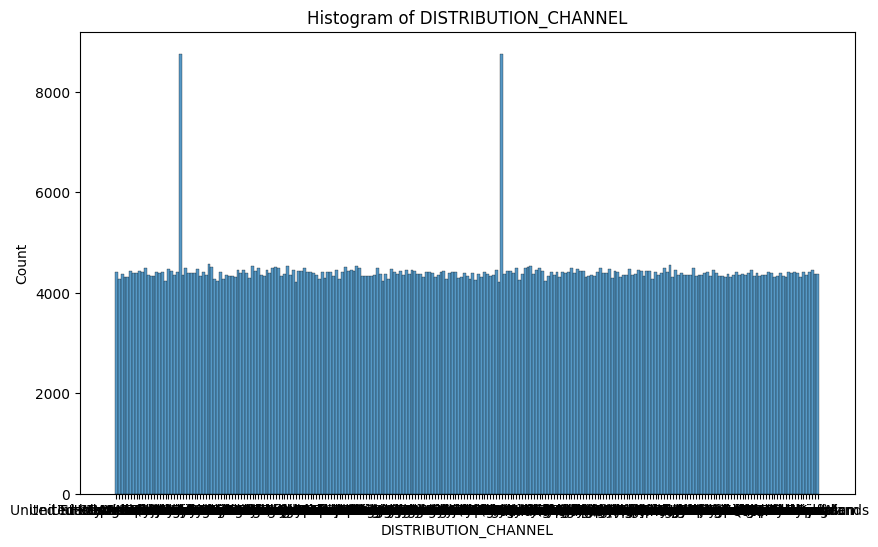

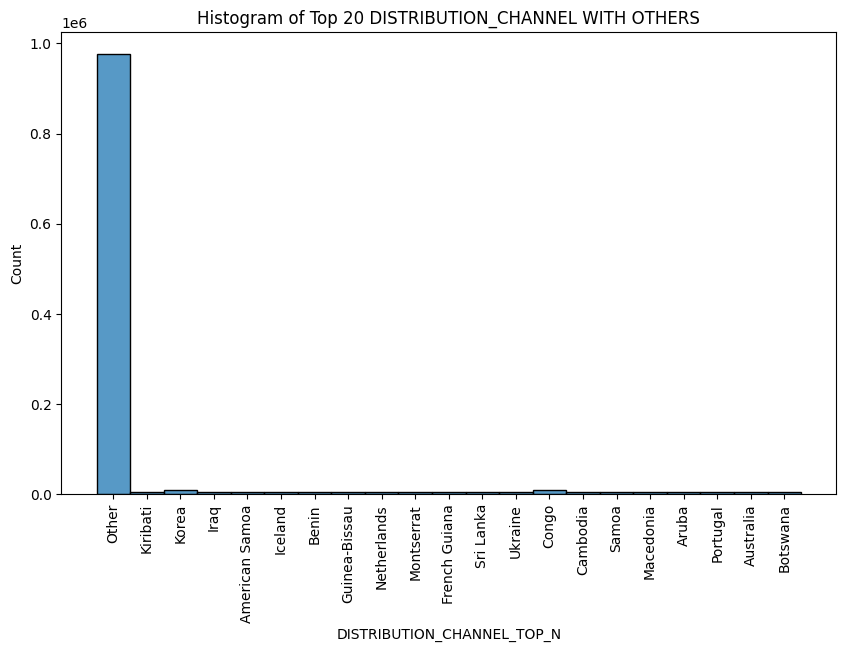

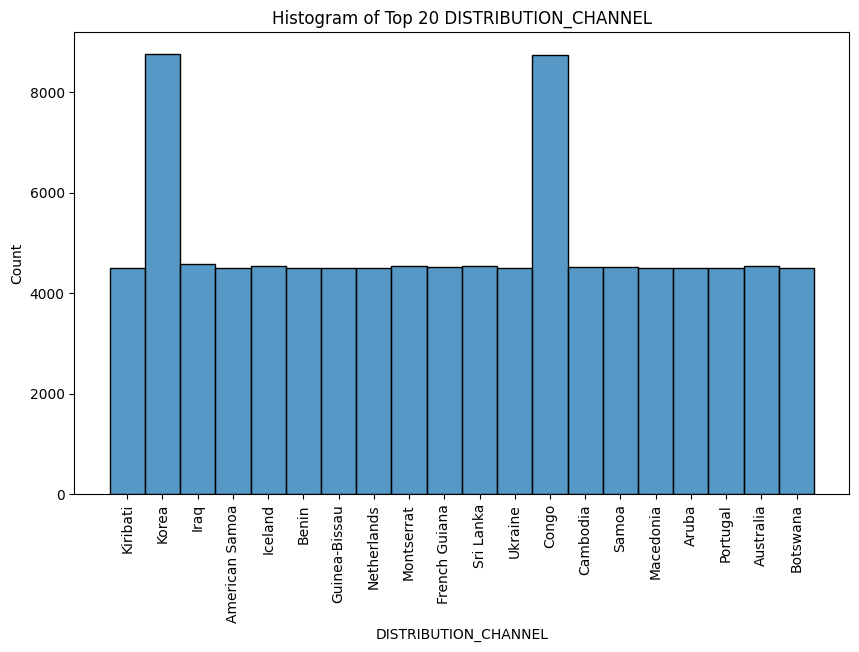

In [ ]:
# 1. Create a Histogram on DISTRIBUTION_CHANNEL

plt.figure(figsize=(10,6))
sns.histplot(df['DISTRIBUTION_CHANNEL'])
plt.title('Histogram of DISTRIBUTION_CHANNEL')
plt.show()

#The plot is cluttered with 243 distribution channels, so we will only display the top 20 and put the rest as "Others".

#We define the number of top categories to display
N = 20

#We create a new column that lists the top N categories and groups all other categories into a single category called "Other."
df['DISTRIBUTION_CHANNEL_TOP_N'] = df['DISTRIBUTION_CHANNEL'].where(df['DISTRIBUTION_CHANNEL'].isin(df['DISTRIBUTION_CHANNEL'].value_counts().index[:N]), 'Other')

# We create a histogram on the new column
plt.figure(figsize=(10,6))
sns.histplot(df['DISTRIBUTION_CHANNEL_TOP_N'])
plt.title('Histogram of Top ' + str(N) + ' DISTRIBUTION_CHANNEL WITH OTHERS')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#The "Other" channels are too large, so we will remove them and only plot the top 20 channels.

# we create a new dataframe that contains only the top N categories
df_top_n = df[df['DISTRIBUTION_CHANNEL'].isin(df['DISTRIBUTION_CHANNEL'].value_counts().index[:N])]

# we create a histogram on the new dataframe
plt.figure(figsize=(10,6))
sns.histplot(df_top_n['DISTRIBUTION_CHANNEL'])
plt.title('Histogram of Top ' + str(N) + ' DISTRIBUTION_CHANNEL')
plt.xticks(rotation=90)
plt.show()

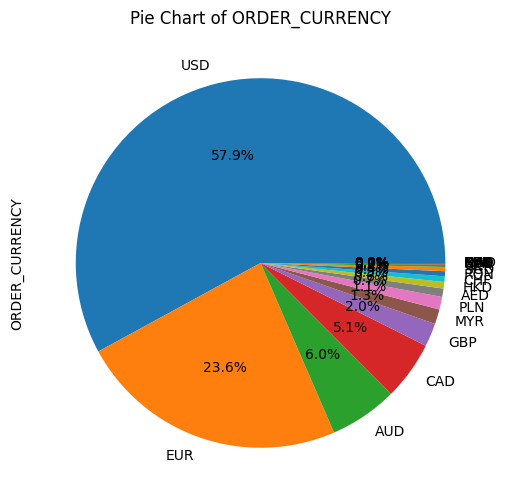

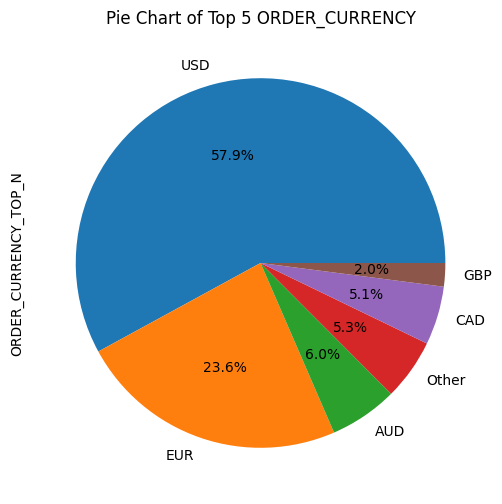

In [ ]:
# 2. Create a Pie Chart on ORDER_CURRENCY
plt.figure(figsize=(10,6))
df['ORDER_CURRENCY'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of ORDER_CURRENCY')
plt.show()

#The original pie plot for all currencies is too crowded and difficult to read. To make it easier to understand, we will create a new pie plot that only shows the top N most frequent currencies.
# We define the number of top categories to display
N = 5
# We create a new column that contains the top N categories and groups the rest into 'Other'
df['ORDER_CURRENCY_TOP_N'] = df['ORDER_CURRENCY'].where(df['ORDER_CURRENCY'].isin(df['ORDER_CURRENCY'].value_counts().index[:N]), 'Other')

# We create a pie chart on the new column
plt.figure(figsize=(10,6))
df['ORDER_CURRENCY_TOP_N'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Top ' + str(N) + ' ORDER_CURRENCY')
plt.show()

In [ ]:
# 3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

# lets import plotlly as it will be better for the cluttered plot as in this case
import plotly.express as px
#We create a line chart of combination over time
aggregated_data = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).size().reset_index(name='count')
fig = px.line(aggregated_data, x='PURCHASE_ORDER_TYPE', y='count', color='DISTRIBUTION_CHANNEL', title='Order Count by Purchase Order Type and Distribution Channel')
fig.show()



<Figure size 1000x600 with 0 Axes>

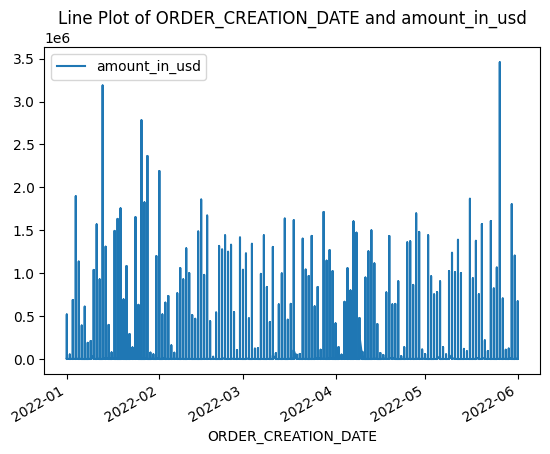

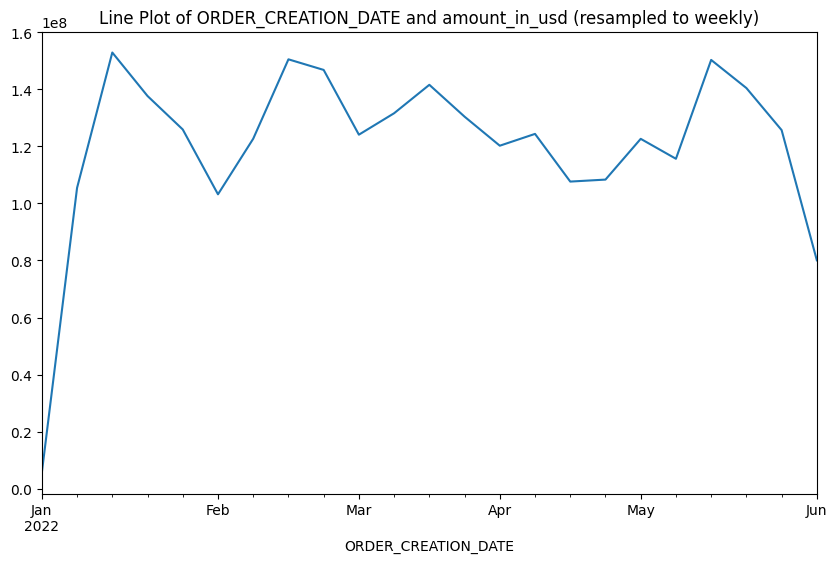

In [ ]:
# 4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd
plt.figure(figsize=(10,6))
df.plot(x='ORDER_CREATION_DATE', y='amount_in_usd')
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd')
plt.show()

# A line plot of ORDER_CREATION_DATE and amount_in_usd, resampled to weekly, can provide further insights into the data. This is because it will show how the amount of money spent on orders changes over time, on a weekly basis. This can be helpful for identifying trends and patterns in spending, which can then be used to make informed decisions about future spending
plt.figure(figsize=(10,6))
df.set_index('ORDER_CREATION_DATE').resample('W')['amount_in_usd'].sum().plot()
plt.title('Line Plot of ORDER_CREATION_DATE and amount_in_usd (resampled to weekly)')
plt.show()

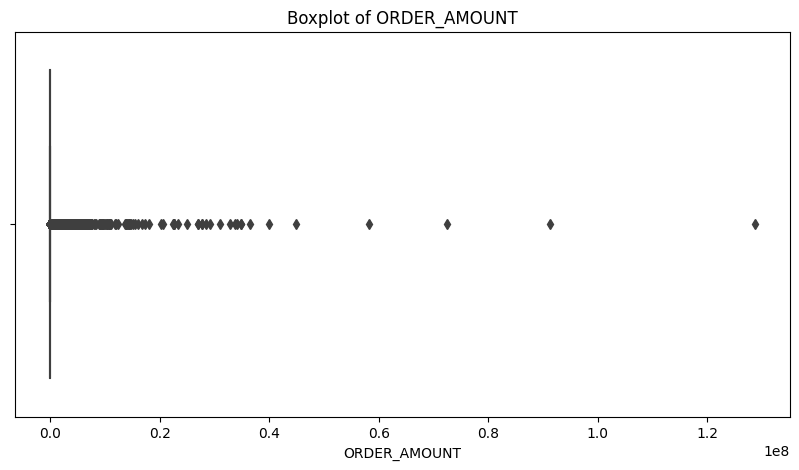

<Axes: title={'center': 'Boxplot of ORDER_AMOUNT Log transformed'}, xlabel='ORDER_AMOUNT'>

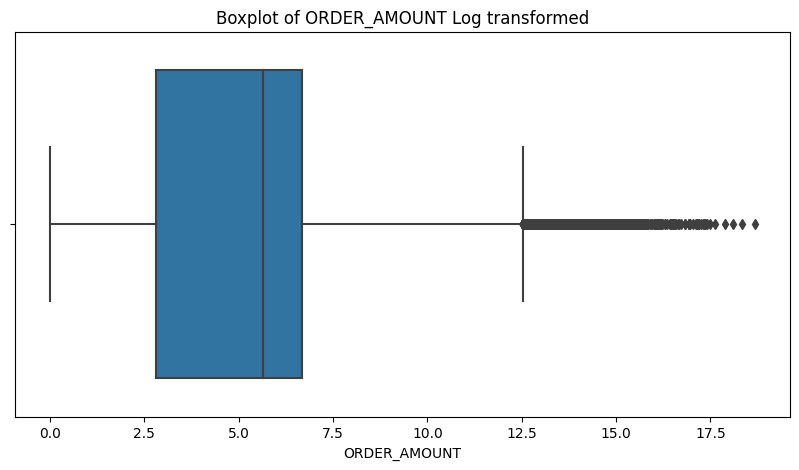

In [ ]:
# 5. Creating a boxplot on ORDER_AMOUNT to find out the outliers

df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
plt.figure(figsize=(10,5))
sns.boxplot(x=df['ORDER_AMOUNT'])
plt.title('Boxplot of ORDER_AMOUNT')
plt.show()


#The box plot using the original values is very cluttered and unbalanced. This is because the values are on a very large scale, with a wide range of values. To make the box plot easier to read, we are applying a log transform to the order amount values. This will reduce the range of values, making the box plot less cluttered and easier to understand.

#A log transform is a mathematical operation that takes the logarithm of a value. This means that it converts the value to a scale where the difference between two values is proportional to the logarithm of the difference between the original values. In other words, a log transform compresses the values on a large scale into a smaller range.
plt.figure(figsize=(10, 5))
# We convert 'ORDER_AMOUNT' to numeric
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
plt.title('Boxplot of ORDER_AMOUNT Log transformed')

# Now we can apply the log transformation and create the boxplot
sns.boxplot(x=np.log1p(df['ORDER_AMOUNT']))


<Axes: xlabel='ORDER_CREATION_DATE'>

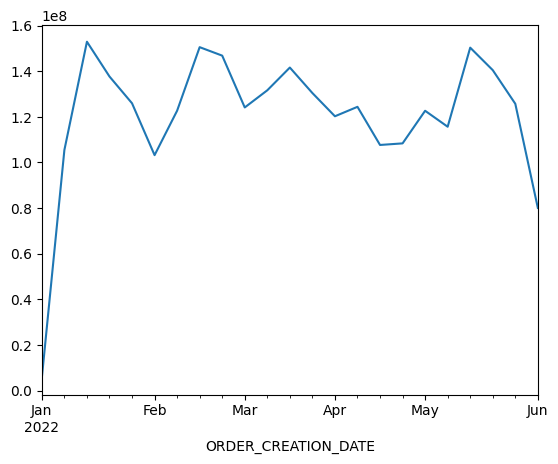

In [ ]:
# 4. Line Plot of ORDER_CREATION_DATE and amount_in_usd (resampled to weekly)
# We have made Line Plot of ORDER_CREATION_DATE and amount_in_usd (resampled to weekly)
df.set_index('ORDER_CREATION_DATE').resample('W')['amount_in_usd'].sum().plot()

<Axes: xlabel='ORDER_AMOUNT'>

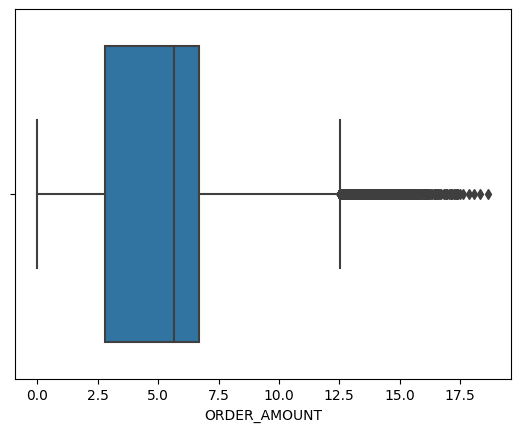

In [ ]:
# 5. Create a boxplot on ORDER_AMOUNT to find out the outliers
#We convert 'ORDER_AMOUNT' to numeric
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

# Now we can apply the log transformation and create the boxplot
sns.boxplot(x=np.log1p(df['ORDER_AMOUNT']))

<Axes: xlabel='COMPANY_CODE'>

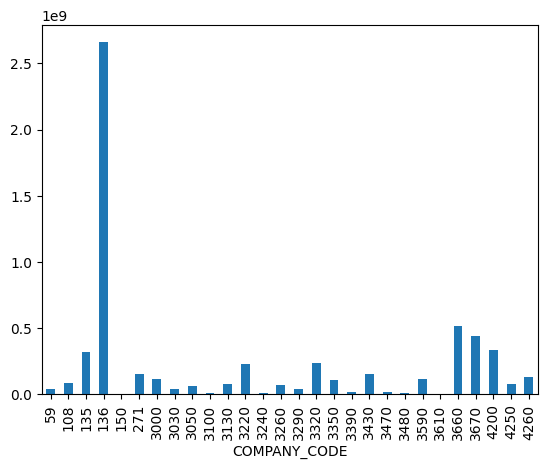

In [ ]:
# 6.Creating a  Bar Chart of COMPANY_CODE and ORDER_AMOUNT
#We create a  Bar Chart of COMPANY_CODE and ORDER_AMOUNT
df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().plot(kind='bar')

MILESTONE 3


Made changes in step 2 and step 3 of Milestone 3 for final submission


In [ ]:
# Importing required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

In [ ]:
# 1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values.
# We assume the appropriate value is mean for this scenario
#We convert the "amount_in_usd" column to a numeric type.
#We calculate the z-scores for each value in the "amount_in_usd" column.
#We set a threshold of 3.
#We replace any values with a z-score greater than the threshold with the mean of the "amount_in_usd" column.
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')
z_scores = np.abs(stats.zscore(df['amount_in_usd']))
threshold = 3
df['amount_in_usd'] = np.where(z_scores > threshold, df['amount_in_usd'].mean(), df['amount_in_usd'])

In [ ]:
# 2. Label encoding or One hot Encoding on all the categorical columns
##FINAL SUBMISSION CHANGES
#In this case, we will perform label encoding.
#To do this, we need to fill any missing values with a placeholder value.
#We use the fillna() method to do this.
categorical_cols = df.select_dtypes(include=['object']).columns

df[categorical_cols] = df[categorical_cols].fillna('Missing')

le = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

In [ ]:
# 3. Applying log transformation on all continious data columns.

##FINAL SUBMISSION CHANGES
# We select all numerical columns.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#We define a small constant to avoid log(0) or log(negative number)
small_constant = 1e-6

#We  apply the log transformation, add a small constant, and round to 6 decimal points by looping through columns.
for cols in numeric_cols:
    df[cols] = df[cols].apply(lambda x: round(np.log(x + small_constant), 6))


In [ ]:

# 4 We group by 'SALES_ORG' and 'DIVISION' columns
grouped_df = df.groupby(['SALES_ORG', 'DIVISION'])

#We calculate the average 'ORDER_AMOUNT' for each group
average_order_amount = grouped_df['ORDER_AMOUNT'].mean().reset_index().rename(columns={'ORDER_AMOUNT': 'AVERAGE_ORDER_AMOUNT'})

#We create a new feature 'TOTAL_ORDER_COUNT' by counting the number of orders in each group
total_order_count = grouped_df.size().rename('TOTAL_ORDER_COUNT')

#We  merge the new features with the original dataframe
df = df.merge(average_order_amount, on=['SALES_ORG', 'DIVISION'], how='left')
df = df.merge(total_order_count, on=['SALES_ORG', 'DIVISION'], how='left')


<ipython-input-268-ba4c515755ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


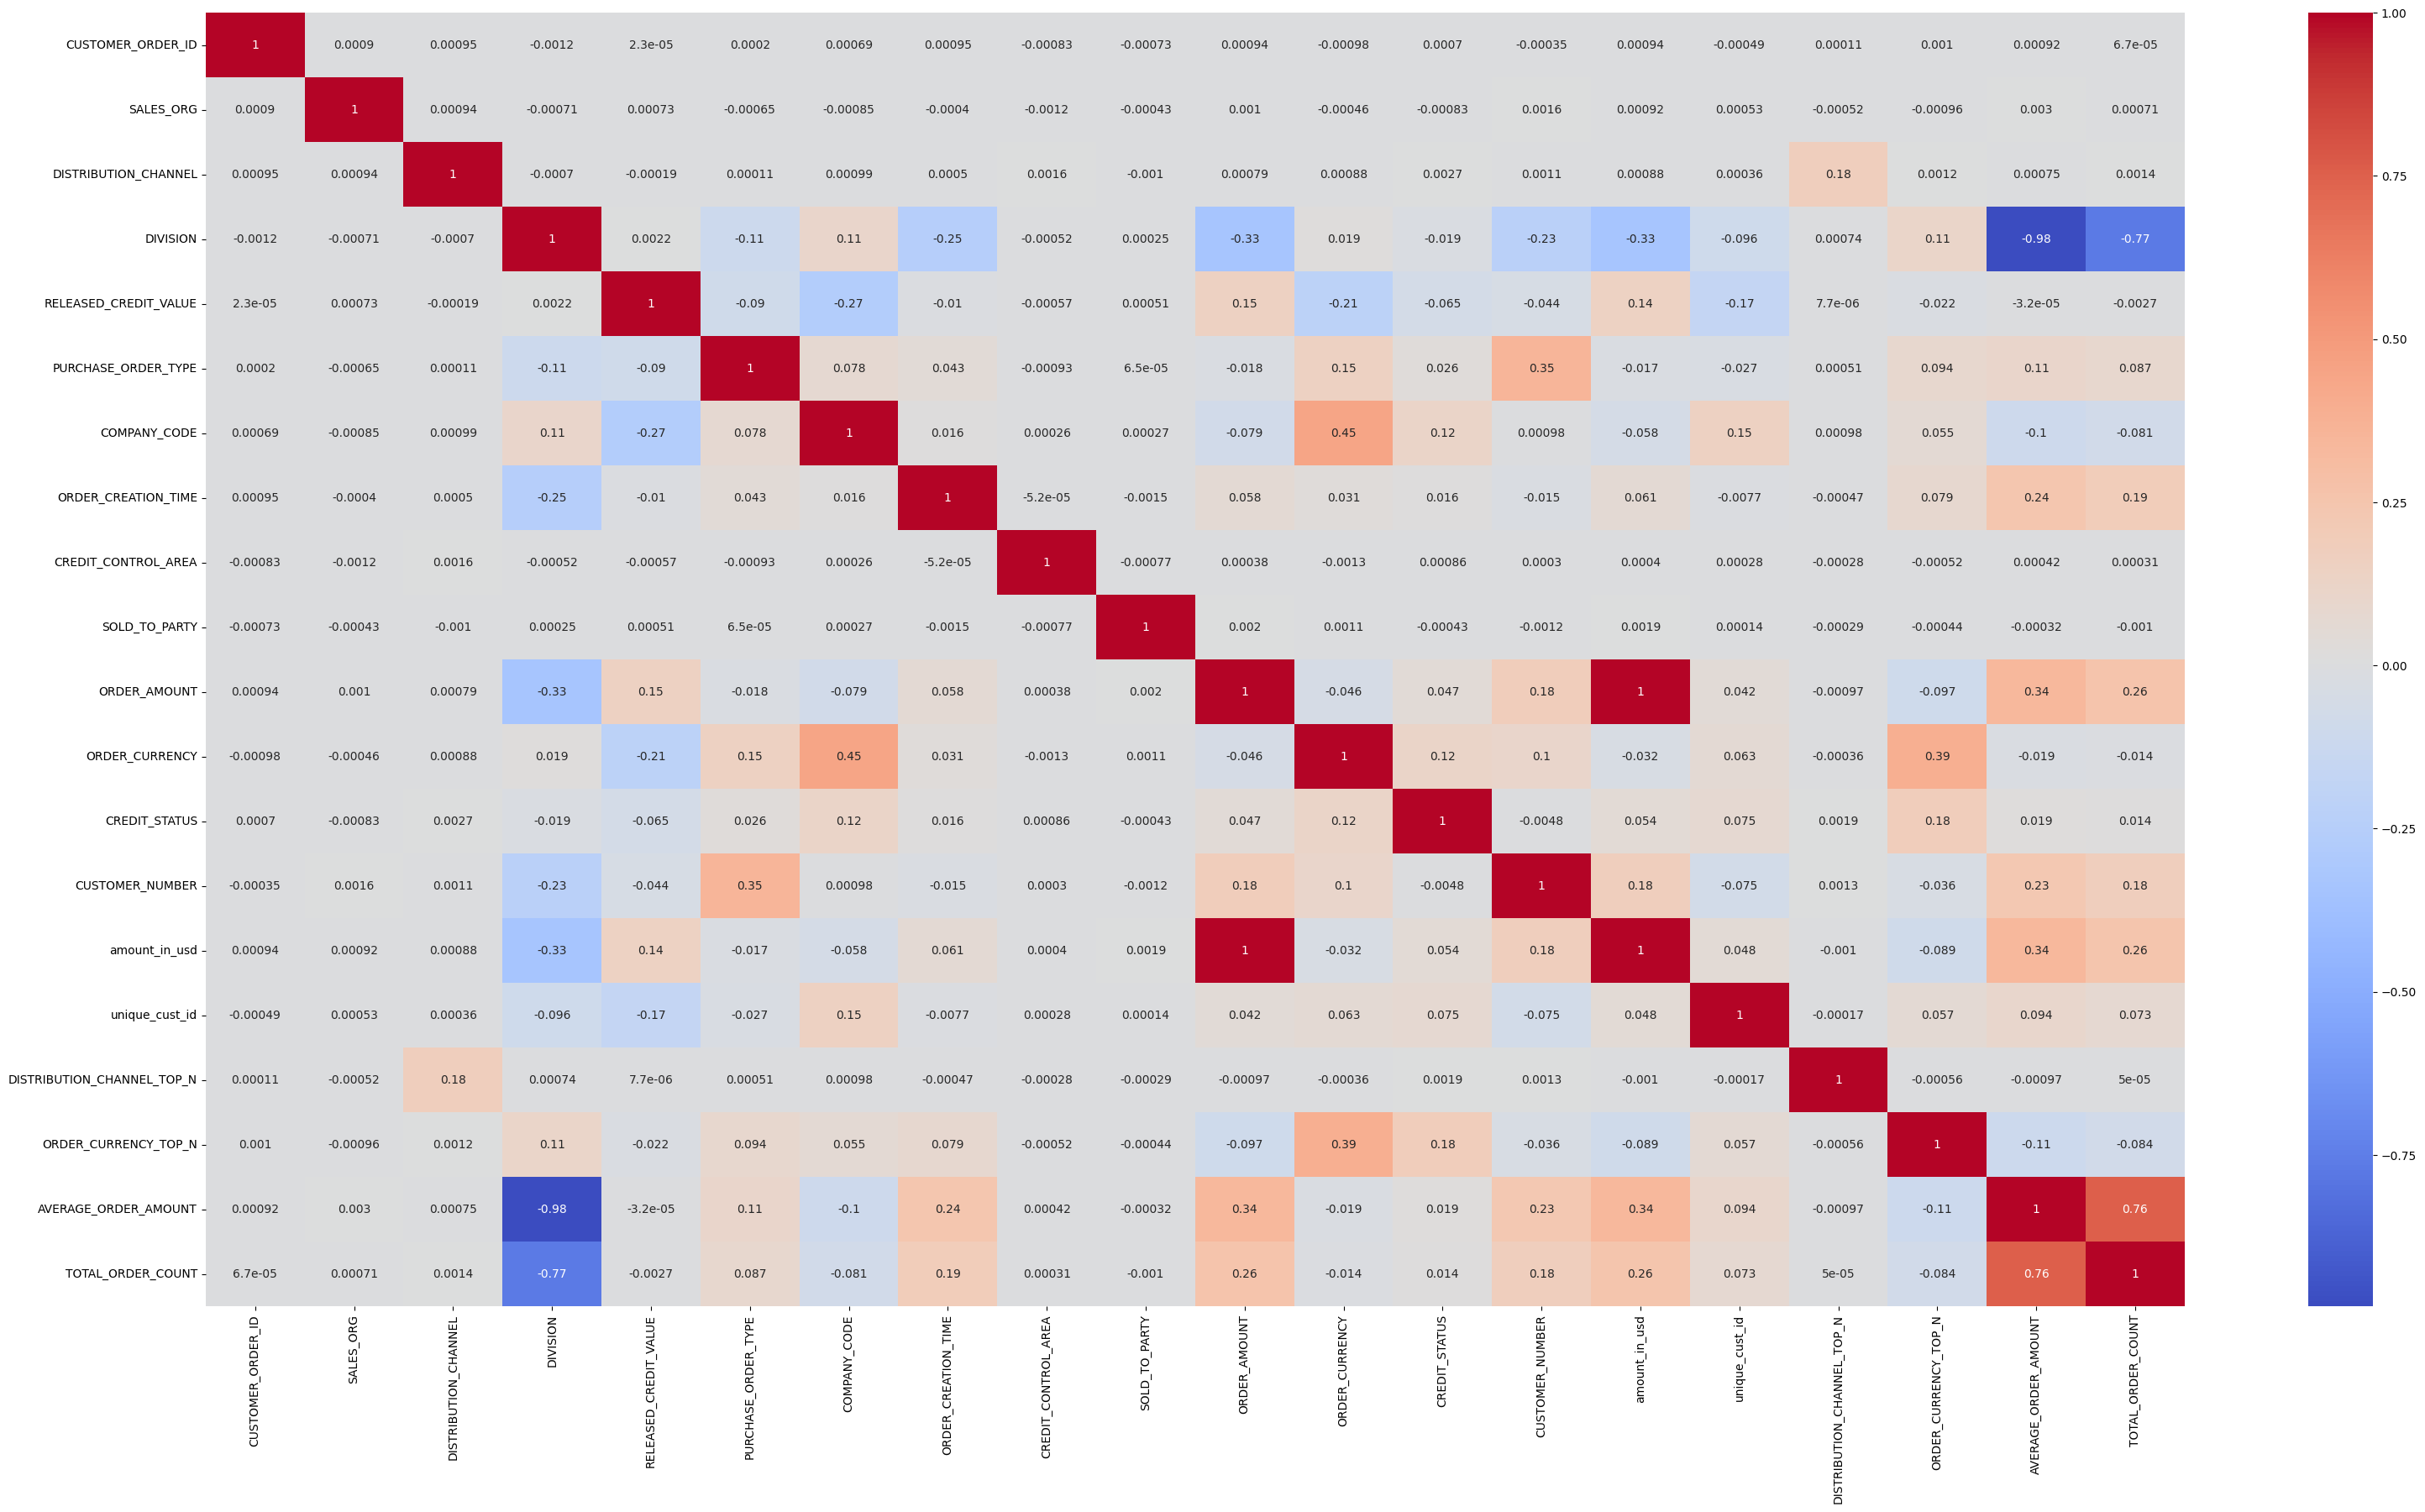

In [ ]:
# 5. Create a heatmap to find correlation between the columns
plt.figure(figsize=(38, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 6. Trying to identify important or relevant columns for feature extraction

# To identify important columns, we can focus on those that exhibit a strong correlation with the target variable
# By choosing the most informative features, we can decrease the number of dimensions, enhance the interpretability of the model, and potentially improve its performance.
# Assuming 'amount_in_usd' is the target variable in this case

#We calculate the correlation coefficients between all numeric columns in the DataFrame and creating a correlation matrix.
correlation = df.corr(numeric_only=True)

#We Identify the important columns by filtering the correlation matrix based on the correlation with the target variable, 'amount_in_usd'.
# We will select the columns where the correlation coefficient with 'amount_in_usd' is greater than 0.3 AND will  ensure that the target variable itself is excluded from the list of important columns.
correlation_with_target = correlation.corr()['amount_in_usd'].abs().sort_values(ascending=False)

#We select the top k columns with highest correlation
k = 5  # for instance taking k = 5
top_k_columns = correlation_with_target[1:k+1].index # Exclude the target variable itself
top_k_columns

Index(['ORDER_AMOUNT', 'AVERAGE_ORDER_AMOUNT', 'DIVISION', 'TOTAL_ORDER_COUNT',
       'ORDER_CURRENCY_TOP_N'],
      dtype='object')

MILESTONE 4


Made changes in step 1 of milestone 4 for final submission


In [ ]:
# 1. Modify the dataset to pass into any type of machine learning models.
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X = df[top_k_columns]
y = df['amount_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')


imputer.fit(X_train)


X_train_imputed = imputer.transform(X_train)
#STEPS
#First, We choose specific columns from the DataFrame df as the input features and assign them to X.

#We take the values from the 'amount_in_usd' column of df and assign them to y as the target labels.

#We split the data into two sets, namely the training and testing sets, using train_test_split function.

#We obtain the training and testing sets for the input features (X_train, X_test) and the target labels (y_train, y_test).

#The data is divided in a way that 80% is allocated for training and 20% for testing. The random state of 42 is set to ensure consistent splits for reproducibility.

#We create an imputer with a strategy (e.g., mean, median, or most_frequent)

# We fit the imputer on the training data

#We transform the training data

In [ ]:
# 2
#We import regression models: LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, and xgboost.


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

#We create instances of the regression models using their respective classes: linear_regression, svr, decision_tree, random_forest, adaboost, and xgboost.
linear_regression = LinearRegression()
svr = SVR()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
xgboost = xgb.XGBRegressor()

In [ ]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#3 Perform Regression model evaluations like MSE, RMSE, R-Square etc.
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

regression_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), xgb.XGBRegressor()]

for model in regression_models:
    print(model.__class__.__name__)

# We make predictions using the trained models on the test dataset
linear_preds = linear_regression.predict(X_test)
# svm_preds = svr.predict(X_test)
dt_preds = decision_tree.predict(X_test)
rf_preds = random_forest.predict(X_test)
adaboost_preds = adaboost.predict(X_test)
xgboost_preds = xgboost.predict(X_test)

# We calculate MSE
linear_mse = mean_squared_error(y_test, linear_preds)
# svm_mse = mean_squared_error(y_test, svm_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
adaboost_mse = mean_squared_error(y_test, adaboost_preds)
xgboost_mse = mean_squared_error(y_test, xgboost_preds)

#We calculate RMSE
linear_rmse = np.sqrt(linear_mse)
# svm_rmse = np.sqrt(svm_mse)
dt_rmse = np.sqrt(dt_mse)
rf_rmse = np.sqrt(rf_mse)
adaboost_rmse = np.sqrt(adaboost_mse)
xgboost_rmse = np.sqrt(xgboost_mse)

# We calculate R-Squared
linear_r2 = r2_score(y_test, linear_preds)
# svm_r2 = r2_score(y_test, svm_preds)
dt_r2 = r2_score(y_test, dt_preds)
rf_r2 = r2_score(y_test, rf_preds)
adaboost_r2 = r2_score(y_test, adaboost_preds)
xgboost_r2 = r2_score(y_test, xgboost_preds)

print("Linear Regression:")
print("MSE:", linear_mse)
print("RMSE:", linear_rmse)
print("R-Squared:", linear_r2)
print()

# print("Support Vector Machine:")
# print("MSE:", svm_mse)
# print("RMSE:", svm_rmse)
# print("R-Squared:", svm_r2)
print()

print("Decision Tree:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R-Squared:", dt_r2)
print()

print("Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-Squared:", rf_r2)
print()

print("AdaBoost:")
print("MSE:", adaboost_mse)
print("RMSE:", adaboost_rmse)
print("R-Squared:", adaboost_r2)
print()

print("XGBoost:")
print("MSE:", xgboost_mse)
print("RMSE:", xgboost_rmse)
print("R-Squared:", xgboost_r2)
print()

LinearRegression
DecisionTreeRegressor
RandomForestRegressor
AdaBoostRegressor
XGBRegressor
Linear Regression:
MSE: 0.24187008219679948
RMSE: 0.49180288957752116
R-Squared: 0.9965169062932691


Decision Tree:
MSE: 0.05052426464997841
RMSE: 0.2247760321964475
R-Squared: 0.9992724162217949

Random Forest:
MSE: 0.02764166351580888
RMSE: 0.16625782241990564
R-Squared: 0.9996019412431623

AdaBoost:
MSE: 0.4468319723601419
RMSE: 0.6684549142314251
R-Squared: 0.9935653156572402

XGBoost:
MSE: 0.026491956731186393
RMSE: 0.1627634993823443
R-Squared: 0.999618497802906



In [ ]:
#4. Compare the accuracies of all the models
#We Create a dictionary to store the R-Squared values for each model
r2_values = {
    'Linear Regression': linear_r2,
    # 'Support Vector Machine': r2_svm,
    'Decision Tree':  dt_r2,
    'Random Forest':rf_r2,
    'AdaBoost': adaboost_r2,
    'XGBoost': xgboost_r2,
}

#We Print the R-Squared values for each model
for model, r2 in r2_values.items():
    print(model, "R-Squared:", r2)

# We Find the model with the highest R-Squared value
best_model = max(r2_values, key=r2_values.get)

#We  Print the best model
print("Best Model based on R-Squared:", best_model)

Linear Regression R-Squared: 0.9965169062932691
Decision Tree R-Squared: 0.9992724162217949
Random Forest R-Squared: 0.9996019412431623
AdaBoost R-Squared: 0.9935653156572402
XGBoost R-Squared: 0.999618497802906
Best Model based on R-Squared: XGBoost


In [ ]:
#5  Select the best possible model
mse_values = {
    'Linear Regression': linear_mse,
    # 'Support Vector Machine': svm_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse,
    'AdaBoost': adaboost_mse,
    'XGBoost': xgboost_mse
}
# We Calculate the average MSE across all models
average_mse = {model: np.mean(mse_values[model]) for model in mse_values}
#We  Find the model with the lowest average MSE
best_model = min(average_mse, key=average_mse.get)
#We Print the best model
print("Best Model:", best_model)

Best Model: XGBoost


In [ ]:
#6 Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#We define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# We create the model
model = RandomForestRegressor()

# We create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5)

# We fit the RandomizedSearchCV object to the training data
random_search.fit(X_train[:10000], y_train[:10000])

# We get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# We print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)
print()

# We  evaluate the best model on the test data
y_pred = best_model.predict(X_test)

#We calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#We print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}

Evaluation Metrics:
MSE: 0.04711513881020575
RMSE: 0.2170602193176026
R-Squared: 0.9993215099528182


In [ ]:
#7. Come up with the best possible model accuracy.
#We fit the final tuned model on the training data
best_model.fit(X_train, y_train)

#We make predictions on the test data
y_pred = best_model.predict(X_test)

#We calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#We  print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Evaluation Metrics:
MSE: 0.027131813700974044
RMSE: 0.1647173752248804
R-Squared: 0.9996092834273023


# **FINAL SUBMISSION**

In [ ]:
# predicted values (log of actual predicted values) :
y_pred

# actual predicted values :
actual_y_pred = np.exp(y_pred)
actual_y_pred

#" XGBoost " is the most accurate model for prediction with hyper-parameters { 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None }

array([6.27238669e+02, 3.42000090e+02, 5.31769044e+02, ...,
       7.66919693e+01, 9.99999558e-07, 1.58715141e+02])

**FINAL SUBMISSION CHANGES THAT I MADE**
**->** In step 2 of milestone 3, I replaced the values in the original columns with their log-transformed values instead of creating new columns. This avoided the issue of creating new columns that were highly correlated with the target variable and also highly dependent on each other.

**->** In step 3 of milestone 3, I added a new feature called 'TOTAL_ORDER_COUNT', which represents the number of orders in each group. This was done by calculating the average order amount in each group.

**->** In step 1 of milestone 4, I filled in the null values in the dataset using a simple imputation technique.

**->**In the final submission, I converted the log-transformed values of y_pred to their actual values.


**->**Finally the best model that i found is XGBoost with the following hyperparameters
{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
